In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import math

from numpy import exp as exp

In [98]:
# crystalball function
def crystal(x):
#     x = x+0j # Prevent warnings...
    a, n, mu, sig = [1, 2, 0.5, 0.02]
    aa = abs(a)
    A = (n/aa)**n * exp(- aa**2 / 2)
    B = n/aa - aa
    C = n*exp(- aa**2 / 2) / (aa * (n-1))
    erf = (2/np.sqrt(np.pi)) * integrate.quad(lambda t: exp(- t**2), 0, aa/np.sqrt(2))[0]
#     erf = math.erf(aa/np.sqrt(2))
    D = np.sqrt(np.pi/2)*(1+erf)
    N = 1./(sig * (C + D))
    total = 0.*x
    if (x-mu)/sig > -a:
        total += N * exp(- ((x-mu)**2)/(2.*sig**2))
    if (x-mu)/sig <= -a:
        total += N * A * (B - (x-mu)/sig)**(-n)
    try:
        return total.real
    except:
        return total
    return total

# to avoid defining a for loop because I have if statement in my function
crystal = np.vectorize(crystal)


def crystal2(x):
#     x = x+0j # Prevent warnings...
    a, n, mu, sig = [1, 2, 0.5, 0.02]
    aa = abs(a)
    A = ((n/aa)**n) * exp(- aa**2 / 2)
    B = n/aa - aa
    C = n*exp(- aa**2 / 2) / (aa * (n-1))
    erf = (2/np.sqrt(np.pi)) * integrate.quad(lambda t: exp(- t**2), 0, aa/np.sqrt(2))[0]
#     erf = math.erf(aa/np.sqrt(2))
    D = np.sqrt(np.pi/2)*(1+erf)
    N = 1./(sig * (C + D))
#     total = 0.*x
    condition1 = lambda x: N * exp(- ((x-mu)**2)/(2.*sig**2))
    condition2 = lambda x: N * A * (B - (x-mu)/sig)**(-n)
    result = np.where((x - mu)/sig > (-a), condition1(x), condition2(x))

    return result



def crystal3(x):
#     x = x+0j # Prevent warnings...
    a, n, xb, sig = [1, 2, 1, 0.2]
    if a < 0:
        a = -a
    if n < 0:
        n = -n
    aa = abs(a)
    A = (n/aa)**n * exp(- aa**2 / 2)
    B = n/aa - aa
    C = n/aa / (n-1.) * exp(-aa**2/2.)
    D = np.sqrt(np.pi/2.) * (1. + math.erf(aa/np.sqrt(2.)))
    N = 1. / (sig * (C+D))
    total = 0.*x
    total += ((x-xb)/sig  > -a) * N * exp(- (x-xb)**2/(2.*sig**2))
    total += ((x-xb)/sig <= -a) * N * A * (B - (x-xb)/sig)**(-n)
    try:
        return total.real
    except:
        return total
    return total

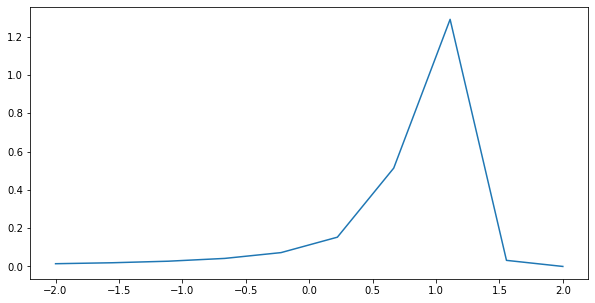

In [99]:
plt.figure(figsize=(10,5))
x_range = np.linspace(-2,2,10)
plt.plot(x_range, crystal3(x_range))

In [115]:
integrate.quad(crystal3, -10000, 10000, points = np.linspace(-2, 2 ,20))

(0.9999851789406482, 4.3928323255047604e-09)

# crystalball function with the normalization <font color='red'>inside</font> of the function

In [116]:
import numpy as np
from scipy import integrate

def crystal_ball(x, a, n, mu, sig):
    aa = abs(a)
    A = (n / aa) ** n * exp(- aa ** 2 / 2)
    B = n / aa - aa
    C = n * exp(- aa ** 2 / 2) / (aa * (n - 1))
    erf = (2/np.sqrt(np.pi)) * integrate.quad(lambda t: exp(- t**2), 0, aa/np.sqrt(2))[0]
    D = np.sqrt(np.pi / 2) * (1 + erf)
    N = 1 / (sig * (C + D))
    
    if (x - mu) / sig > -a:
        return N * exp(- (x - mu) ** 2 / (2 * sig ** 2))
    else:
        return N * A * (B - (x - mu) / sig) ** (-n)

params = {'a': 1, 'n': 2, 'mu': 0.5, 'sig': 0.02}

# defined sample ranges
lower_limit = params['mu'] - 5 * params['sig']
upper_limit = params['mu'] + 5 * params['sig']
result = integrate.quad(lambda x: crystal_ball(x, **params), lower_limit, upper_limit)
print(result)

(0.8782797984860791, 7.906066434146147e-09)


# crystalball function witt the normalization <font color='red'>outside</font> of the function

In [118]:
import numpy as np
from scipy import integrate

def crystal_ball_unnormalized(x, a, n, mu, sig):
    aa = abs(a)
    A = (n / aa) ** n * np.exp(- aa ** 2 / 2)
    B = n / aa - aa
    
    if (x - mu) / sig > -a:
        return np.exp(- (x - mu) ** 2 / (2 * sig ** 2))
    else:
        return A * (B - (x - mu) / sig) ** (-n)

params = {'a': 1, 'n': 2, 'mu': 0.5, 'sig': 0.02}

# defined sample ranges
lower_limit = params['mu'] - 5 * params['sig']
upper_limit = params['mu'] + 5 * params['sig']
integral, _ = integrate.quad(lambda x: crystal_ball_unnormalized(x, **params), lower_limit, upper_limit)

# Calculate the normalization factor
normalization_factor = 1 / integral

def crystal_ball_normalized(x):
    return normalization_factor * crystal_ball_unnormalized(x, **params)

# Integrate the normalized function over the same range
result = integrate.quad(crystal_ball_normalized, lower_limit, upper_limit)
print(result)  # This is now very close to 1 but stil not exactly 1

(0.9999999999999999, 9.001762784853291e-09)


$ $
$ $

$ $
$ $